In [ ]:
# cnn model with batch normalization for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import keras
import tensorflow as tf
import keras.utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Loading the data and normalization

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-4000], X_train_full[-4000:]
y_train, y_valid = y_train_full[:-4000], y_train_full[-4000:]

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
from keras.utils import to_categorical
import numpy as np

# one hot encoding
num_classes = 10
y_train = np.eye(num_classes)[y_train.squeeze()]
y_test = np.eye(num_classes)[y_test.squeeze()]
y_valid = np.eye(num_classes)[y_valid.squeeze()]

# CNN Model Building
## I will build a fully connected CNN model. 


*  I set the padding to the 'same' and I will initialise the weights en utilisant he_uniform.
*   The activation funtion in the hidden layer is relu, and sigmoid for the output layer
* The learning is 0.001
 


In [ ]:
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  #model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  #model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  #model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.5))

  model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  #model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))

 # compile model
  model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = define_model()
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

 ### To prevent overfitting I used a callback as shown next

In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping callback

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
from keras import callbacks
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    batch_size=64, 
                    callbacks=early_stop,
                    validation_data=(X_valid, y_valid), 
                    verbose=2)

Epoch 1/100
875/875 - 15s - loss: 0.3175 - accuracy: 0.9092 - val_loss: 0.0434 - val_accuracy: 0.9885 - 15s/epoch - 17ms/step
Epoch 2/100
875/875 - 3s - loss: 0.0693 - accuracy: 0.9791 - val_loss: 0.0316 - val_accuracy: 0.9935 - 3s/epoch - 4ms/step
Epoch 3/100
875/875 - 3s - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0265 - val_accuracy: 0.9925 - 3s/epoch - 4ms/step
Epoch 4/100
875/875 - 3s - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0304 - val_accuracy: 0.9912 - 3s/epoch - 4ms/step
Epoch 5/100
875/875 - 3s - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0310 - val_accuracy: 0.9925 - 3s/epoch - 4ms/step
Epoch 6/100
875/875 - 3s - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0295 - val_accuracy: 0.9925 - 3s/epoch - 4ms/step
Epoch 7/100
875/875 - 3s - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0246 - val_accuracy: 0.9937 - 3s/epoch - 4ms/step
Epoch 8/100
875/875 - 3s - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0262 - val_accuracy: 0.9937 - 3s/epoch - 4ms/step
Epoch 9/100
8

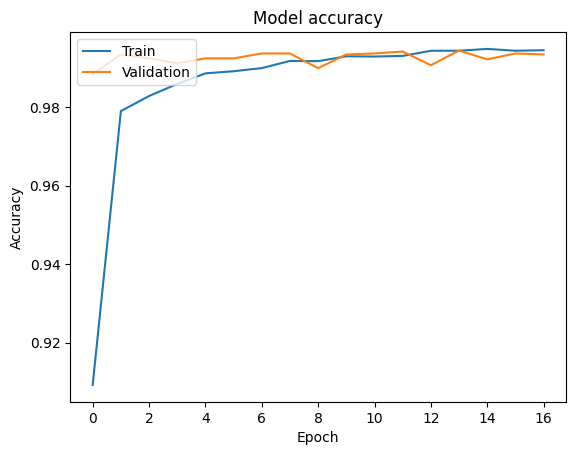

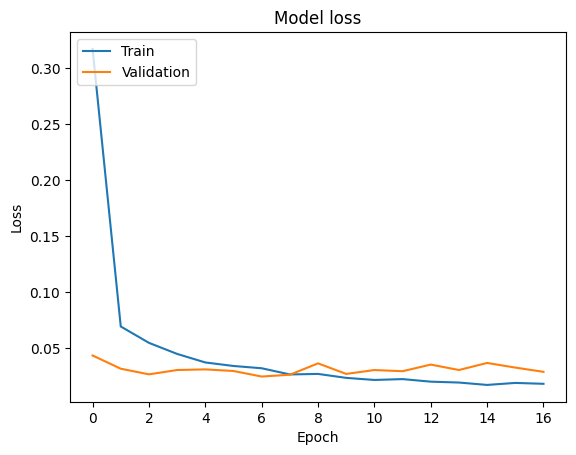

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9921
Test loss: 0.0313371941447258
Test accuracy: 0.9921000003814697
